In [1]:
%run ../chap12/rnn_ext_model.ipynb
%run ../chap12/dataset_videoshot.ipynb

In [2]:
vsd  = VideoShotDataset('../../data/chap12', ['AStarIsBorn1937.mp4'])
print(vsd)

Creating thumbnail cache is done
videoshot(binary, 159651 frames, 639.0 shots, 2000 train_data)


Model vsm1 train started:
    Epoch 2: cost=0.660, accuracy=0.621/0.685 (8/8 secs)
    Epoch 4: cost=0.553, accuracy=0.738/0.782 (9/17 secs)
    Epoch 6: cost=0.471, accuracy=0.799/0.818 (8/25 secs)
    Epoch 8: cost=0.425, accuracy=0.829/0.833 (8/33 secs)
    Epoch 10: cost=0.388, accuracy=0.855/0.833 (8/41 secs)
Model vsm1 train ended in 41 secs:
Model vsm1 test report: accuracy = 0.848, (0 secs)

Model vsm1 Visualization


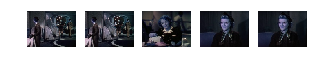

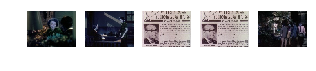

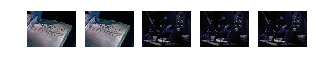

Est: 0.19,0.74,0.98,0.41
Ans: 0.00,1.00,1.00,0.00
Est: 0.42,0.91,0.25,0.97
Ans: 1.00,1.00,0.00,1.00
Est: 0.33,0.21,0.22,0.20
Ans: 0.00,1.00,0.00,0.00


In [3]:
conf1 = \
    [['seqwrap', ['avg',{'stride':30}],
                 ['conv',{'ksize':3, 'chn':12}],
                 ['full', {'width':16}]],
    ['lstm', {'recur_size':8}]]
    
vsm1 = RnnExtModel('vsm1', vsd, conf1)
vsm1.exec_all(epoch_count=10, report=2, show_cnt=3)

Model vsm2 train started:
    Epoch 2: cost=0.693, accuracy=0.503/0.492 (8/8 secs)
    Epoch 4: cost=0.623, accuracy=0.665/0.750 (8/16 secs)
    Epoch 6: cost=0.506, accuracy=0.764/0.740 (8/24 secs)
    Epoch 8: cost=0.484, accuracy=0.769/0.792 (9/33 secs)
    Epoch 10: cost=0.431, accuracy=0.818/0.840 (8/41 secs)
Model vsm2 train ended in 41 secs:
Model vsm2 test report: accuracy = 0.834, (0 secs)

Model vsm2 Visualization


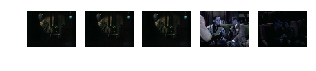

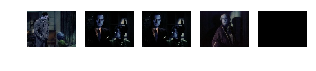

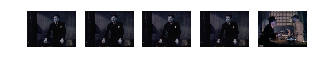

Est: 0.13,0.16,0.84,0.88
Ans: 0.00,0.00,1.00,1.00
Est: 0.75,0.09,0.97,0.58
Ans: 1.00,0.00,1.00,1.00
Est: 0.13,0.15,0.11,0.76
Ans: 0.00,0.00,0.00,1.00


In [4]:
conf2 = \
    [['seqwrap', ['avg',{'stride':30}],
                 ['conv',{'ksize':3, 'chn':12}],
                 ['full', {'width':16}]],
    ['lstm', {'recur_size':8}],
    ['lstm', {'recur_size':4}]]
    
vsm2 = RnnExtModel('vsm2', vsd, conf2)
vsm2.exec_all(epoch_count=10, report=2, show_cnt=3)

Model vsm3 train started:
    Epoch 2: cost=0.693, accuracy=0.502/0.520 (60/60 secs)
    Epoch 4: cost=0.693, accuracy=0.505/0.480 (59/119 secs)
    Epoch 6: cost=0.693, accuracy=0.498/0.507 (60/179 secs)
    Epoch 8: cost=0.693, accuracy=0.498/0.502 (59/238 secs)
    Epoch 10: cost=0.693, accuracy=0.491/0.522 (60/298 secs)
Model vsm3 train ended in 298 secs:
Model vsm3 test report: accuracy = 0.521, (1 secs)

Model vsm3 Visualization


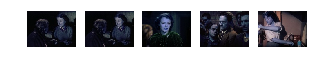

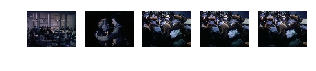

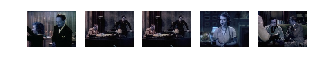

Est: 0.50,0.50,0.50,0.50
Ans: 0.00,1.00,1.00,1.00
Est: 0.50,0.50,0.50,0.50
Ans: 1.00,1.00,0.00,0.00
Est: 0.50,0.50,0.50,0.50
Ans: 1.00,0.00,1.00,1.00


In [5]:
conf3 = \
    [['seqwrap', ['conv',{'ksize':1, 'chn':2}],
                 ['max',{'stride':2}],
                 ['conv',{'ksize':1, 'chn':4}],
                 ['max',{'stride':3}],
                 ['conv',{'ksize':1, 'chn':8}],
                 ['avg',{'stride':5}],
                 ['full', {'width':8}]],
    ['lstm', {'recur_size':8}],
    ['lstm', {'recur_size':4}]]
    
vsm3 = RnnExtModel('vsm3', vsd, conf3)
vsm3.exec_all(epoch_count=10, report=2, show_cnt=3)

Model vsm1_6 train started:
    Epoch 2: cost=0.693, accuracy=0.514/0.594 (10/10 secs)
    Epoch 4: cost=0.536, accuracy=0.749/0.778 (10/20 secs)
    Epoch 6: cost=0.458, accuracy=0.810/0.818 (10/30 secs)
    Epoch 8: cost=0.415, accuracy=0.835/0.828 (9/39 secs)
    Epoch 10: cost=0.371, accuracy=0.867/0.866 (10/49 secs)
Model vsm1_6 train ended in 49 secs:
Model vsm1_6 test report: accuracy = 0.881, (1 secs)

Model vsm1_6 Visualization


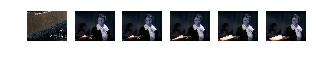

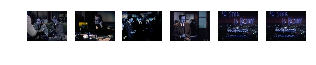

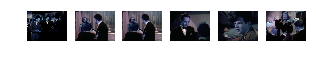

Est: 0.83,0.28,0.34,0.26,0.30
Ans: 1.00,0.00,0.00,0.00,0.00
Est: 0.27,0.27,0.97,0.47,0.28
Ans: 1.00,1.00,1.00,1.00,0.00
Est: 0.24,0.21,0.98,0.31,0.91
Ans: 1.00,0.00,1.00,1.00,1.00


In [6]:
vsd.set_timesteps(6)

vsm1_6 = RnnExtModel('vsm1_6', vsd, conf1)
vsm1_6.exec_all(epoch_count=10, report=2, show_cnt=3)

vsd.set_timesteps(5)

In [7]:
vsm1.exec_all(epoch_count=40, show_cnt=0)
vsm2.exec_all(epoch_count=40, show_cnt=0)
vsm3.exec_all(epoch_count=40, show_cnt=0)

Model vsm1 train ended in 161 secs:
Model vsm1 test report: accuracy = 0.910, (0 secs)

Model vsm2 train ended in 169 secs:
Model vsm2 test report: accuracy = 0.926, (0 secs)

Model vsm3 train ended in 1240 secs:
Model vsm3 test report: accuracy = 0.496, (3 secs)

